<a href="https://colab.research.google.com/github/lokesh-lk/Sample-project/blob/main/nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy import stats

In [5]:
from google.colab import drive

In [128]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
nifty = pd.read_csv('/content/drive/MyDrive/Dataset/NTF.csv')

In [145]:
nifty

,Date,Open,High,Low,Close,Shares Turned,Turnover
0,30-07-2019,11879.20,11932.65,11853.95,11913.45,548979515,1.650000e+11
1,31-07-2019,11908.30,11946.80,11823.20,11840.45,659035969,2.040000e+11
2,01-08-2019,11858.75,11895.65,11802.65,11872.10,559494025,1.910000e+11
3,02-08-2019,11904.20,11973.65,11879.25,11895.45,580154179,2.240000e+11
4,03-08-2019,11915.15,11946.20,11867.60,11884.50,514352437,1.800000e+11
...,...,...,...,...,...,...,...
484,28-12-2020,13815.15,13885.30,13811.55,13873.20,403634030,2.090000e+11
485,29-12-2020,13910.35,13967.60,13859.90,13932.60,439593961,2.520000e+11
486,30-12-2020,13980.90,13997.00,13864.95,13981.95,380681073,2.460000e+11
487,31-12-2020,13970.00,14024.85,13936.45,13981.75,452410109,2.630000e+11


In [146]:
nifty_returns=(nifty['Close']/nifty['Open'])-1

volatility= np.std(nifty_returns)
trading_days=len(nifty_returns)
mean=(nifty.loc[trading_days-1,'Close']/nifty.loc[0,'Open'])-1

print('Annual Average Nifty return',mean)
print('Annual volatility',volatility*np.sqrt(trading_days))
print('Number of trading days',trading_days)

Annual Average Nifty return 0.18008788470604076
Annual volatility 0.27856448612719614
Number of trading days 489


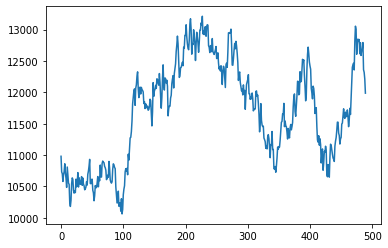

In [147]:
daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

index_returns=[10980]  
                               
for x in daily_returns:
    index_returns.append(index_returns[-1]*x)

plt.plot(index_returns)
plt.show()

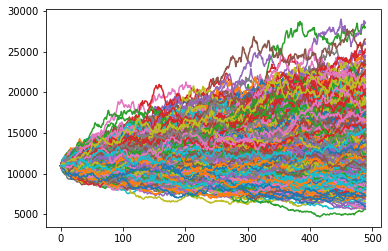

In [148]:
for i in range(1000):
    daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

    index_returns=[10980]  
    
    for x in daily_returns:
        index_returns.append(index_returns[-1]*x)

    plt.plot(index_returns)

plt.show()

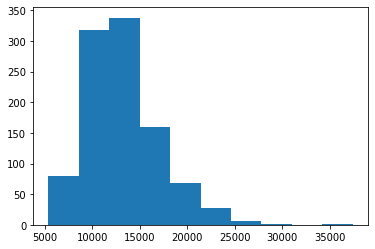

In [149]:
index_result=[]

for i in range(1000):
    daily_returns=np.random.normal(mean/trading_days,volatility,trading_days)+1

    index_returns=[10980]  
    
    for x in daily_returns:
        index_returns.append(index_returns[-1]*x)
 
    index_result.append(index_returns[-1])

plt.hist(index_result)
plt.show()

In [150]:
print('Average expected value of Nifty:',np.mean(index_result))
print('10 percentile:',np.percentile(index_result,10))
print('90 percentile:',np.percentile(index_result,90))

Average expected value of Nifty: 13226.583364498727
10 percentile: 8933.19276011444
90 percentile: 18301.597649931497


In [151]:
from fbprophet import Prophet

In [152]:
nifty.head()

,Date,Open,High,Low,Close,Shares Turned,Turnover
0,30-07-2019,11879.20,11932.65,11853.95,11913.45,548979515,1.650000e+11
1,31-07-2019,11908.30,11946.80,11823.20,11840.45,659035969,2.040000e+11
2,01-08-2019,11858.75,11895.65,11802.65,11872.10,559494025,1.910000e+11
3,02-08-2019,11904.20,11973.65,11879.25,11895.45,580154179,2.240000e+11
4,03-08-2019,11915.15,11946.20,11867.60,11884.50,514352437,1.800000e+11


In [153]:
nifty=nifty.iloc[:,0:2]
nifty.head()

,Date,Open
0,30-07-2019,11879.20
1,31-07-2019,11908.30
2,01-08-2019,11858.75
3,02-08-2019,11904.20
4,03-08-2019,11915.15


In [154]:
nifty['Date']= pd.to_datetime(nifty['Date'])
nifty.rename(columns={'Date':'ds','Open':'y'},inplace=True)

In [155]:
model=Prophet()
model.fit(nifty)

predict_df=model.make_future_dataframe(periods=252)
predict_df.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
736,2021-09-06
737,2021-09-07
738,2021-09-08
739,2021-09-09
740,2021-09-10


In [156]:
forecast=model.predict(predict_df)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
736,2021-09-06,12426.524941,10216.487645,14534.001826,11494.947495,13216.239745,25.610668,25.610668,25.610668,25.610668,25.610668,25.610668,0.0,0.0,0.0,12452.135609
737,2021-09-07,12423.095506,10235.362560,14402.734241,11483.004511,13217.653830,-42.025832,-42.025832,-42.025832,-42.025832,-42.025832,-42.025832,0.0,0.0,0.0,12381.069674
738,2021-09-08,12419.666071,10256.500168,14387.677742,11471.061526,13218.158971,-113.915821,-113.915821,-113.915821,-113.915821,-113.915821,-113.915821,0.0,0.0,0.0,12305.750250
739,2021-09-09,12416.236636,10341.997893,14340.715469,11459.118542,13220.461176,-115.732735,-115.732735,-115.732735,-115.732735,-115.732735,-115.732735,0.0,0.0,0.0,12300.503901
740,2021-09-10,12412.807201,10353.829124,14299.323974,11447.186837,13223.549662,-153.743043,-153.743043,-153.743043,-153.743043,-153.743043,-153.743043,0.0,0.0,0.0,12259.064158


In [125]:
#set up a 95% chance of occurance
norm.ppf(0.95)

1.6448536269514722

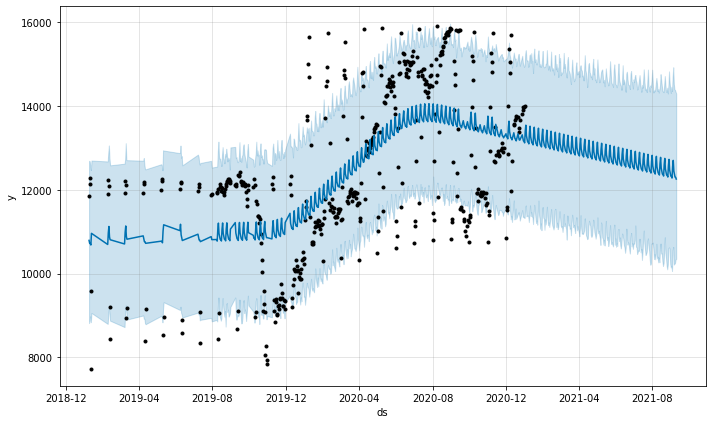

In [157]:
fig1=model.plot(forecast)

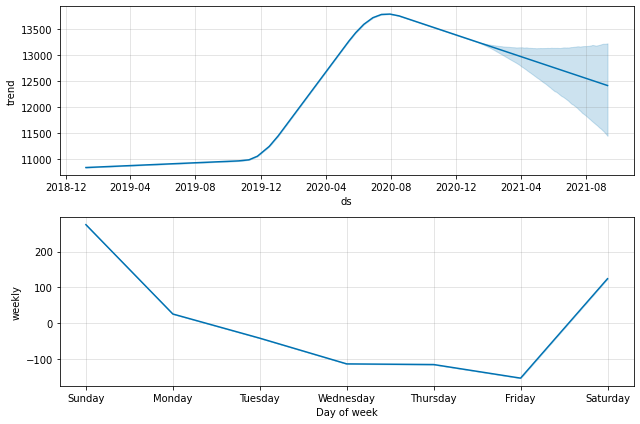

In [158]:
fig2=model.plot_components(forecast)